### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Collection

## 3.2 
### Define the data sources, parameters and quantity of raw datasets (0.4 point) 

In [2]:
# Loading the dataset
data = pd.read_csv('crime_dataset.csv')

In [3]:
# Displaying information about the Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926429 entries, 0 to 7926428
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

### Collect necessary and sufficient raw datasets; Show samples from raw datasets. (0.1 point)

In [4]:
data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
data.sample(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7458441,11508368,JB517219,11/14/2018 06:00:00 PM,030XX N Southport Ave,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,32.0,6.0,11,NaN,NaN,2018,11/21/2018 04:14:47 PM,NaN,NaN,NaN
2136615,1428950,G151176,03/15/2001 06:00:00 PM,005XX W CORNELIA AV,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,NaN,NaN,08A,1171891.0,1923756.0,2001,09/07/2021 03:41:02 PM,41.946244,-87.643583,"(41.946243567, -87.643583496)"
5404657,8161188,HT395984,07/13/2011 11:23:00 PM,103XX S ABERDEEN ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,STREET,True,False,...,34.0,73.0,18,1170807.0,1836426.0,2011,02/10/2018 03:50:01 PM,41.706626,-87.650121,"(41.70662559, -87.650120579)"
1749207,6289962,HP364384,05/30/2008 04:00:00 AM,082XX S DR MARTIN LUTHER KING JR DR,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,...,6.0,44.0,07,1180335.0,1850445.0,2008,02/28/2018 03:56:25 PM,41.744883,-87.614801,"(41.744882725, -87.614801011)"
3160553,2614009,HJ217187,03/03/2003 07:00:00 PM,022XX N SEDGWICK ST,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,43.0,7.0,03,1173223.0,1915036.0,2003,02/10/2018 03:50:01 PM,41.922286,-87.638947,"(41.922286039, -87.638947142)"


### EDA before pre-processing the data

### 1. Crime type frequencies and Top 10 Crime types

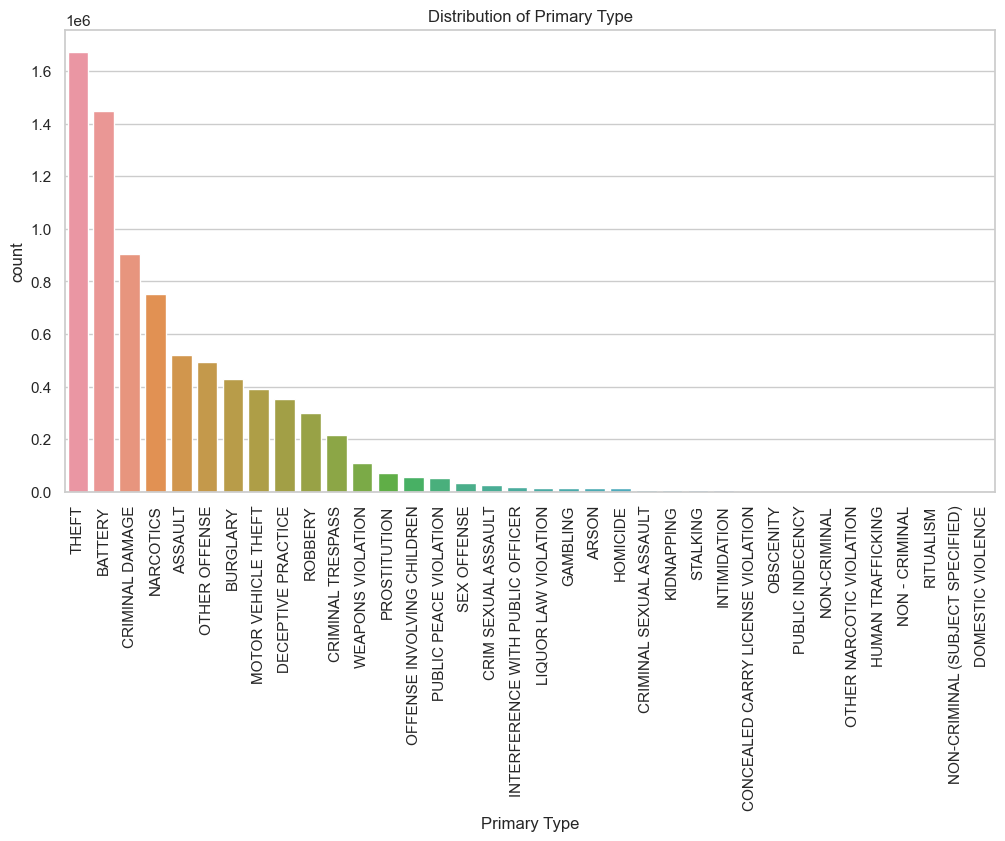

Top 10 Primary Types:
Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY'],
      dtype='object')


In [6]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Visualize the distribution of the target variable "Primary Type"
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary Type', data=data, order=data['Primary Type'].value_counts().index)
plt.title('Distribution of Primary Type')
plt.xticks(rotation=90)
plt.show()

# Print the top 10 Primary Types
top_primary_types = data['Primary Type'].value_counts().nlargest(10).index
print("Top 10 Primary Types:")
print(top_primary_types)

## Data Pre-processing

## 3.3

### Pre-process collected raw data with cleaning and validation tools;  (0.4 point) 

#### 1. Checking the Missing values

In [7]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     11981
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Community Area          613477
FBI Code                     0
X Coordinate             90298
Y Coordinate             90298
Year                         0
Updated On                   0
Latitude                 90298
Longitude                90298
Location                 90298
dtype: int64


#### 2. Handling missing values

###  do count plot if possible

#### Imputing the missing values using mean and mode for numerical and categorical columns respectively

In [8]:
num_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

cat_cols = data.select_dtypes(include='object').columns
imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = imputer.fit_transform(data[cat_cols])


In [9]:
# Checking for missing values after imputing
print("Missing values:\n", data.isnull().sum())


Missing values:
 ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


#### 3.Checking for Duplicate values

In [10]:
# Checking for duplicate rows
print("Duplicate rows:", data.duplicated().sum())

# Dropping duplicate rows (if necessary)
data = data.drop_duplicates()

Duplicate rows: 0


#### 4. Printing Basic Statistics

In [11]:
# Displaying basic statistics of the numerical columns
print("Basic Statistics:\n", data.describe())

Basic Statistics:
                  ID          Beat      District          Ward  Community Area  \
count  7.926429e+06  7.926429e+06  7.926429e+06  7.926429e+06    7.926429e+06   
mean   7.135345e+06  1.185397e+03  1.129546e+01  2.276081e+01    3.745963e+01   
std    3.564939e+06  7.033249e+02  6.955598e+00  1.330463e+01    2.069237e+01   
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00   
25%    3.844933e+06  6.210000e+02  6.000000e+00  1.100000e+01    2.400000e+01   
50%    7.134231e+06  1.034000e+03  1.000000e+01  2.276081e+01    3.745963e+01   
75%    1.031053e+07  1.731000e+03  1.700000e+01  3.200000e+01    5.300000e+01   
max    1.326376e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

       X Coordinate  Y Coordinate          Year      Latitude     Longitude  
count  7.926429e+06  7.926429e+06  7.926429e+06  7.926429e+06  7.926429e+06  
mean   1.164614e+06  1.885812e+06  2.010177e+03  4.184226e+01 -8.767145e+01  
std    1.674623e+

#### 5.Printing unique values in categorical columns

In [12]:
# Displaying unique values in categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}:", data[column].unique())

Unique values in Case Number: ['JA371270' 'JC213749' 'JC212333' ... 'JD311791' 'JD340297' 'JD177406']
Unique values in Date: ['03/18/2015 12:00:00 PM' '12/20/2018 03:00:00 PM'
 '05/01/2016 12:25:00 AM' ... '05/06/2020 09:51:00 AM'
 '09/14/2020 06:13:00 PM' '07/27/2020 03:02:00 PM']
Unique values in Block: ['0000X W WACKER DR' '023XX N LOCKWOOD AVE' '055XX S ROCKWELL ST' ...
 '012XX W Montana St' '037XX S Union Ave' '014XX N Sandburg TER']
Unique values in IUCR: ['1153' '1154' '2820' '0810' '0820' '0460' '051A' '0430' '0890' '1195'
 '143A' '1130' '1120' '3730' '1563' '0486' '0420' '1140' '2825' '0860'
 '0620' '2024' '0560' '2027' '2250' '2014' '0281' '0454' '141A' '0910'
 '1310' '1320' '5000' '1150' '0498' '041A' '1220' '1206' '1156' '1210'
 '5002' '1811' '4387' '0610' '1155' '2826' '1110' '1152' '0496' '1751'
 '1122' '1752' '1780' '0520' '0265' '0440' '1121' '1754' '1477' '0930'
 '1330' '1345' '0340' '1822' '0320' '0497' '031A' '0530' '0870' '502P'
 '1710' '502R' '1365' '1261' '3710' '

Unique values in Location Description: ['BANK' 'APARTMENT' 'STREET' 'RESIDENCE' 'OTHER'
 'RESIDENCE - PORCH / HALLWAY' 'RESTAURANT' 'HOTEL/MOTEL' 'BAR OR TAVERN'
 'SIDEWALK' 'ATHLETIC CLUB' 'RESIDENCE PORCH/HALLWAY' 'SMALL RETAIL STORE'
 'POLICE FACILITY/VEH PARKING LOT' 'TAVERN/LIQUOR STORE'
 'VEHICLE NON-COMMERCIAL' 'OTHER (SPECIFY)' 'HOSPITAL BUILDING / GROUNDS'
 'CHA APARTMENT' 'DRIVEWAY - RESIDENTIAL'
 'PARKING LOT / GARAGE (NON RESIDENTIAL)' 'COMMERCIAL / BUSINESS OFFICE'
 'DEPARTMENT STORE' 'LIBRARY' 'GROCERY FOOD STORE'
 'NURSING HOME/RETIREMENT HOME' 'RESIDENCE-GARAGE' 'GAS STATION'
 'DRUG STORE' 'PARKING LOT/GARAGE(NON.RESID.)' 'CTA TRAIN' 'WAREHOUSE'
 'CONSTRUCTION SITE' 'MEDICAL / DENTAL OFFICE'
 'ATM (AUTOMATIC TELLER MACHINE)' 'RESIDENTIAL YARD (FRONT/BACK)'
 'CONVENIENCE STORE' 'CHA PARKING LOT / GROUNDS' 'HOTEL / MOTEL'
 'HOSPITAL BUILDING/GROUNDS' 'MEDICAL/DENTAL OFFICE' 'RESIDENCE - GARAGE'
 'ALLEY' 'NURSING / RETIREMENT HOME' 'PARK PROPERTY'
 'RESIDENCE - YARD (FRONT

#### Some sample of data

In [13]:
# Displaying samples from the pre-processed dataset
print("Samples from the pre-processed dataset:\n", data.sample(5))

Samples from the pre-processed dataset:
                 ID Case Number                    Date  \
4080644  3835285.0    HL207557  02/28/2005 10:20:00 AM   
4197749  3976341.0    HL334684  05/04/2005 12:13:12 PM   
6427189  9820732.0    HX470166  10/11/2014 09:30:00 PM   
1241169  5218217.0    HM801679  12/30/2006 10:00:00 AM   
6131743  9298045.0    HW443264  09/07/2013 11:30:00 PM   

                                       Block  IUCR   Primary Type  \
4080644                   025XX W MEDILL AVE  0610       BURGLARY   
4197749                     032XX W 111TH ST  0860          THEFT   
6427189  047XX S DR MARTIN LUTHER KING JR DR  2825  OTHER OFFENSE   
1241169                  067XX N WESTERN AVE  0820          THEFT   
6131743                      053XX W 53RD PL  0486        BATTERY   

                     Description Location Description  Arrest  Domestic  ...  \
4080644           FORCIBLE ENTRY            RESIDENCE   False     False  ...   
4197749             RETAIL THEFT   

### Performing EDA  after pre-processing to analyze the data more

### 1. Crime type frequencies and Top 10 Crime types

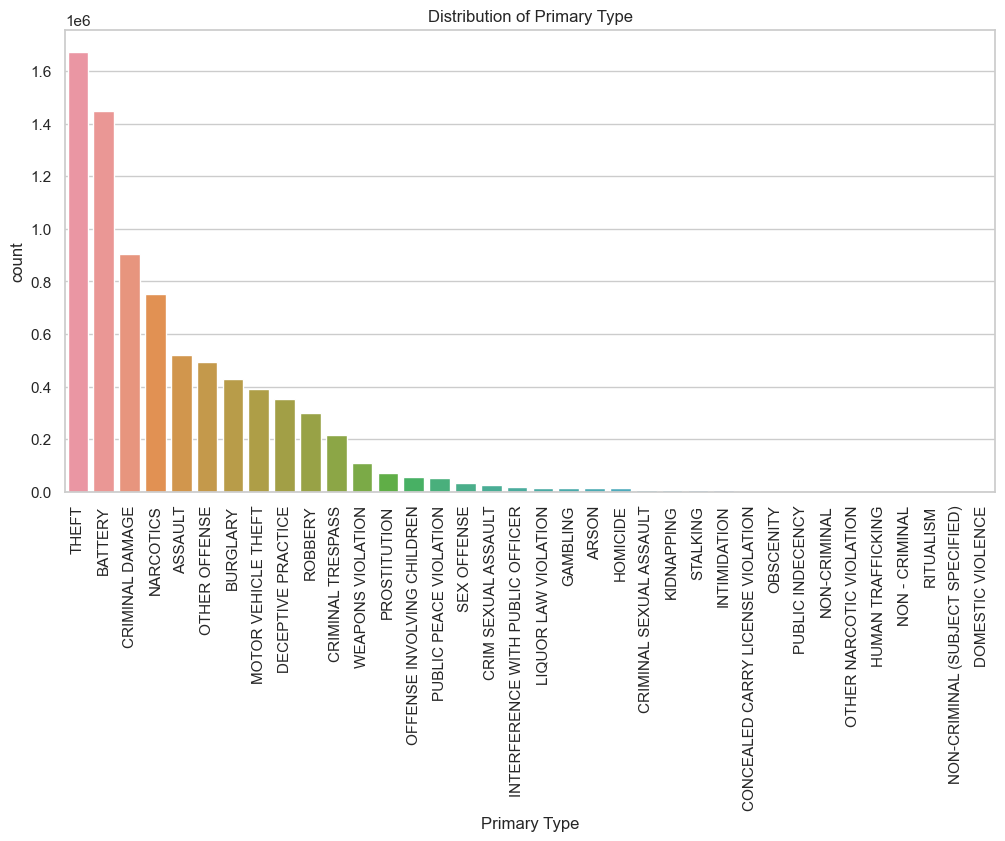

Top 10 Primary Types:
Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY'],
      dtype='object')


In [14]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Visualize the distribution of the target variable "Primary Type"
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary Type', data=data, order=data['Primary Type'].value_counts().index)
plt.title('Distribution of Primary Type')
plt.xticks(rotation=90)
plt.show()

# Print the top 10 Primary Types
top_primary_types = data['Primary Type'].value_counts().nlargest(10).index
print("Top 10 Primary Types:")
print(top_primary_types)

### 2. Top 10 Community areas where the crime is majorly happening

<Figure size 1500x800 with 0 Axes>

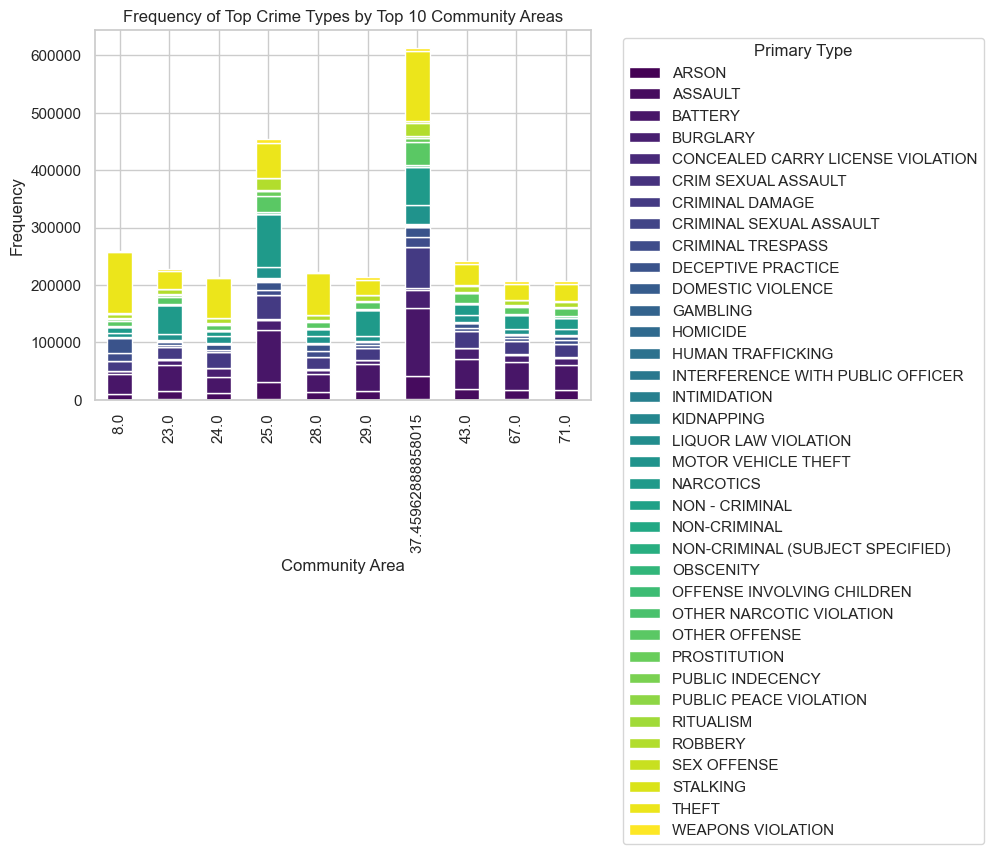

In [15]:
import matplotlib.pyplot as plt

# Select the top N community areas with the highest crime frequency
top_community_areas = data['Community Area'].value_counts().nlargest(10).index
data_top_community_areas = data[data['Community Area'].isin(top_community_areas)]

# Grouping data by 'Primary Type' and 'Community Area' and counting the frequency
crime_counts_by_community = data_top_community_areas.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(15, 8))  # Provide both width and height values
crime_counts_by_community.plot(kind='bar', stacked=True, colormap='viridis')

# Setting x and y labels and title for the plot
plt.xlabel('Community Area')
plt.ylabel('Frequency')
plt.title('Frequency of Top Crime Types by Top 10 Community Areas')

# Customizing the legend
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3.Top 10 Crime types and top 10 location descriptions

<Figure size 1500x1500 with 0 Axes>

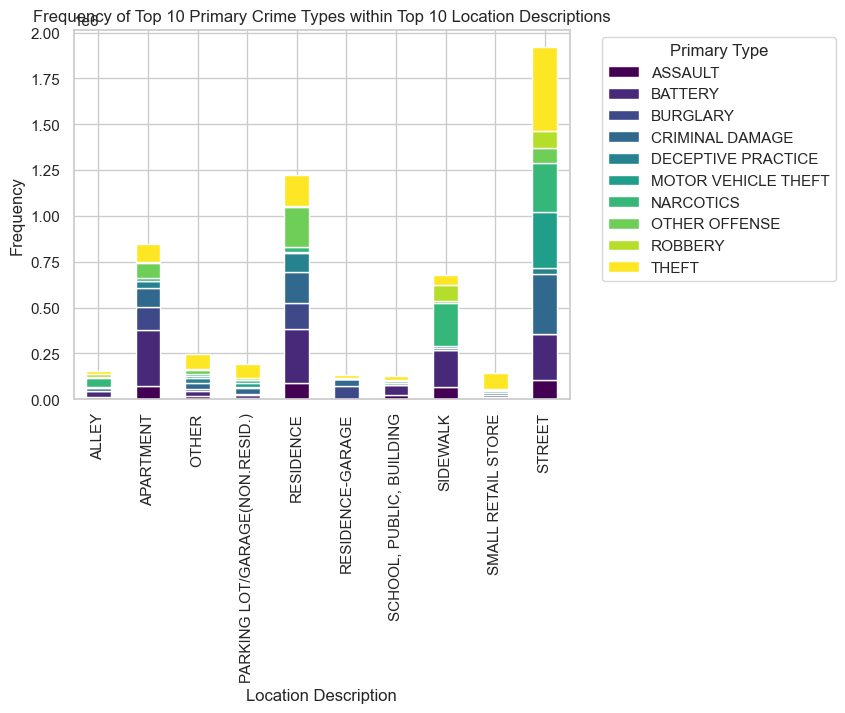

In [16]:
# Select the top N primary crime types and top N location descriptions
top_primary_types = data['Primary Type'].value_counts().nlargest(10).index
top_location_descriptions = data['Location Description'].value_counts().nlargest(10).index

data_top_primary_types_locations = data[data['Primary Type'].isin(top_primary_types) & data['Location Description'].isin(top_location_descriptions)]

# Grouping data by 'Location Description' and 'Primary Type' and counting the frequency
crime_counts_by_location = data_top_primary_types_locations.groupby(['Location Description', 'Primary Type']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(15, 15))
crime_counts_by_location.plot(kind='bar', stacked=True, colormap='viridis')

# Setting x and y labels and title for the plot
plt.xlabel('Location Description')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Primary Crime Types within Top 10 Location Descriptions')

# Customizing the legend
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Data Transformation

## 3.4

### Transform pre-processed datasets to desired formats , show the related tools , scripts or formulas, methods;  (0.4 point)

In [17]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [18]:
data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294.0,6397683,653292,1219,135,9,232,23,False,False,...,42.0,32.0,13,1.164614e+06,1.885812e+06,2015.0,3392,41.842264,-87.671447,830487
1,11646293.0,6844308,3188902,21623,136,9,231,17,False,False,...,36.0,19.0,13,1.164614e+06,1.885812e+06,2018.0,1501,41.842264,-87.671447,830487
2,11645836.0,6843484,1048858,44415,135,9,232,189,False,False,...,15.0,63.0,13,1.164614e+06,1.885812e+06,2016.0,1501,41.842264,-87.671447,830487
3,11645959.0,6843050,3188928,37627,315,26,470,160,False,False,...,33.0,14.0,9,1.164614e+06,1.885812e+06,2018.0,1501,41.842264,-87.671447,830487
4,11645601.0,6843826,1338751,57489,135,9,232,160,False,False,...,21.0,71.0,13,1.164614e+06,1.885812e+06,2014.0,1501,41.842264,-87.671447,830487


### EDA after Label Encoding

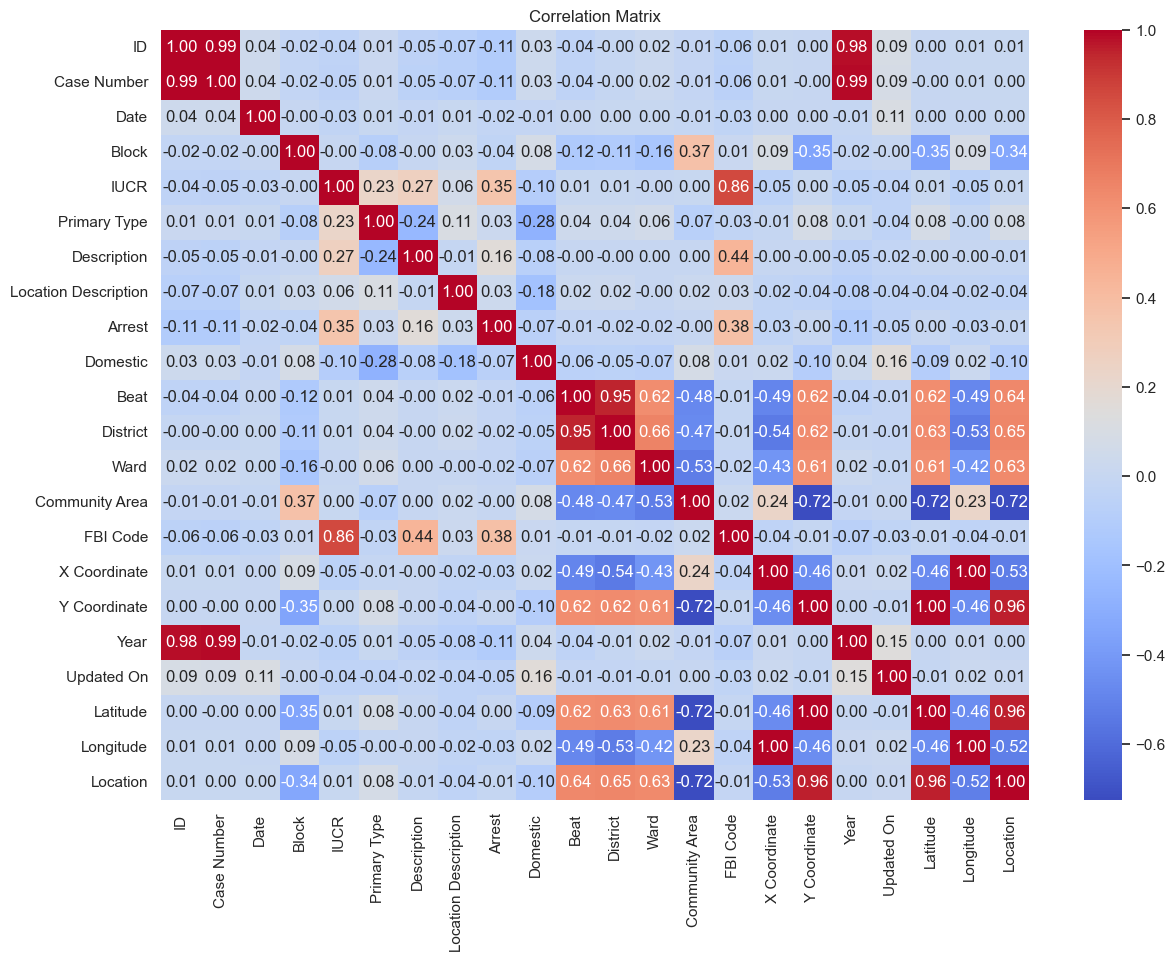

In [19]:
# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Selection and Engineering

### Using Lasso Regression (L1 Regularization) and Domain knowledge for feature selection

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

X = data.drop(['Primary Type'], axis=1)

# Target variable
y = data['Primary Type']

# Assuming 'X' and 'y' are your feature matrix and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply L1 regularization with cross-validated selection of the best alpha
lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

# Get selected features with non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0]

print("Selected Features:", selected_features)


Selected Features: Index(['ID', 'Date', 'Block', 'IUCR', 'Description', 'Location Description',
       'Domestic', 'District', 'Ward', 'FBI Code', 'Updated On', 'Longitude',
       'Location'],
      dtype='object')


In [21]:
# Loading the selected features based on Lasso Regression (L1 Regularization) and Domain knowledge into a new CSV file
selected_features = [
    'Date','Year','Longitude','Latitude','Location Description','Primary Type','Description'
]

data_selected = data[selected_features]

In [22]:
# Save the new CSV file as preprocessed_crimes_data.csv
data_selected.to_csv('preprocessed_crimes_data.csv', index=False)

In [23]:
# Load the preprocessed_crimes_data.csv file
data_selected = pd.read_csv('preprocessed_crimes_data.csv')

In [24]:
data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
5,2223711,2018.0,-87.671447,41.842264,160,34,360
6,7618,2018.0,-87.671447,41.842264,160,9,232
7,778818,2018.0,-87.671447,41.842264,160,9,232
8,276626,2015.0,-87.671447,41.842264,140,9,232
9,1084232,2012.0,-87.671447,41.842264,189,9,232


In [25]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'}, inplace=True)

In [26]:
data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
5,2223711,2018.0,-87.671447,41.842264,160,34,360
6,7618,2018.0,-87.671447,41.842264,160,9,232
7,778818,2018.0,-87.671447,41.842264,160,9,232
8,276626,2015.0,-87.671447,41.842264,140,9,232
9,1084232,2012.0,-87.671447,41.842264,189,9,232


In [27]:
# Checking for missing values after feature engineering
print("Missing values:\n", data_selected.isnull().sum())

Missing values:
 Date                    0
Year                    0
Longitude               0
Latitude                0
Location Description    0
Crime_Type              0
Description             0
dtype: int64


## Data Preparation

### 3.5

#### Preparing Training, Validation and testing datasets from Transformed dataset (preprocessed_crimes_data.csv)